# Notes

15-June-2016

We have obtained geospatial data of cycle routes by using an app from Strava, a cycle fitness company. This notebook contains an initial exploration of that data. 

The data is given in GPX format, an XML like file format for geospatial data. Inital data was collected by Phil, Agne and Peter over the dates 13 - 15 June 2016. It will be periodically updated.

Initial ideas for this analysis include creating an interactive map of all bike routes, colored by person. A time lapsed movie could also be made to show the progression of routes over time.

There is low volume of data at this point. At best, we can attempt to give an impression of what a more extensive  data collection effort.

In [4]:
#pip install gpxpy
#pip install folium
%matplotlib inline

# Parse GPX data

In [8]:
from os import listdir
from os.path import isfile, join
import gpxpy

data_path = '../data/raw/geo/'
data = [f for f in listdir(data_path) if isfile(join(data_path,f)) and f != "README.docx"]

lat, lon = [], []

for activity in data:
    gpx_filename = join(data_path,activity)
    gpx_file = open(gpx_filename, 'r')
    gpx = gpxpy.parse(gpx_file)

    activity_lat, activity_lon = [], []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                activity_lat.append(point.latitude)
                activity_lon.append(point.longitude)
    lat.append(activity_lat)
    lon.append(activity_lon)

# Visualization I
* [Visualizing Strava Tracks with Python](http://andykee.com/visualizing-strava-tracks-with-python.html)

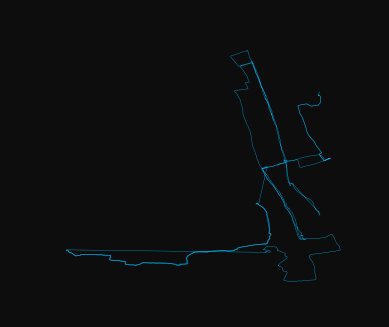

In [21]:
fig = plt.figure(facecolor = '0.05')
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_aspect('equal')
ax.set_axis_off()
fig.add_axes(ax)

#Plot each activity separately. Else, get connected lines
for activity_lon, activity_lat in zip(lon, lat):
    plt.plot(activity_lon, activity_lat, color = 'deepskyblue', lw = 0.4, alpha = 0.8)

# Visualization II
* [deparkes/GPX_Folium_Map.py](https://gist.github.com/deparkes/610b112f74eadbda663806ba8dd83069)
* [Trackprofiler](http://www.trackprofiler.com/)


TODO
* Plot different colored flags for different users

In [14]:
import gpxpy
import gpxpy.gpx
import folium

gpx_file = open('../data/raw/geo/20160611_phil.gpx', 'r')

gpx = gpxpy.parse(gpx_file)
points = []
for track in gpx.tracks:
    for segment in track.segments:        
        for point in segment.points:
            points.append([point.latitude, point.longitude])

In [36]:
points = []
for activity_lon, activity_lat in zip(lon, lat):
    for x,y in zip(activity_lon, activity_lat):
        points.append([y, x])

In [37]:
#Map rendering is slow. Thin points. 
points = [x for i,x in enumerate(points) if i%10==0]

In [38]:
len(points)

605

In [39]:
# Load map centred on Oxford
uk = folium.Map(location=[51.7520, -1.2577], zoom_start=13)


#add a marker for each toilet
for each in points:  
    folium.Marker(each).add_to(uk)

In [40]:
uk

In [41]:
# Save map
uk.save("./figures/20160615-leaflet.html")